In [179]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time
import base

import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False   

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [180]:
#读取user_pay_count
user_pay_counts = base.ReadUserPayCountCSV();
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();
##读取城市名称对照表
city_names = base.ReadCityNameCSV();
#读取休假表
calenders = base.ReadCalendarCSV();



In [181]:
def plotShopPayCounts(shop_id, date_range, time_range):
    counts = base.countShopPayTimePeriods(user_pay_counts, shop_id, date_range, time_range)
    #counts = base.WipeInvalidUserPayCount(counts)
    counts['holiday'] = calenders.loc[counts.index.strftime('%Y-%m-%d')]['daytype'].values
    info = shop_infos.ix[shop_id]
    weathers = base.readWeatherData(city_names.loc[info['city']])
    counts['weather'] = weathers.loc[counts.index]['desc'].values
    
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(counts.index, counts['count'])
    
#     temp = counts[counts['weather'] == '1']
#     ax.scatter(temp.index, temp['count'], color='r', s=100)
#     temp = counts[counts['weather'] == '2']
#     ax.scatter(temp.index, temp['count'], color='g', s=100)
#     temp = counts[counts['weather'] == '3']
#     ax.scatter(temp.index, temp['count'], color='b', s=100)
#     temp = counts[counts['weather'] == '4']
#     ax.scatter(temp.index, temp['count'], color='k', s=100)
#     temp = counts[counts['weather'] == '5']
#     ax.scatter(temp.index, temp['count'], color='y', s=100)
    
    temp = counts[counts['holiday'] == 1]
    ax.scatter(temp.index, temp['count'], color='r')
    temp = counts[counts['holiday'] == 2]
    ax.scatter(temp.index, temp['count'], color='g')
    temp = counts[counts['holiday'] == 3]
    ax.scatter(temp.index, temp['count'], color='b')
    temp = counts[counts['holiday'] == 4]
    ax.scatter(temp.index, temp['count'], color='k')
    temp = counts[counts['holiday'] == 5]
    ax.scatter(temp.index, temp['count'], color='y')
    
    

    
    print(type(info.cate_3_name))
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    mean_value = np.mean(counts['count'])
    print('mean_value=' + str(mean_value))
    ax.axhline(y=mean_value, linewidth=1, color='r')
    #holiday_counts = choiceCalendarDay(counts, 0)
    #calendar.ix[s.index.strftime('%Y-%m-%d')][1]
    #calendar_filter = calendar.ix[counts.index.strftime('%Y-%m-%d')][1] == 1]
    #print(holiday_counts)
    #ax.scatter(holiday_counts.index, holiday_counts.values, c='r')
    #ax.plot(holiday_counts.index, holiday_counts.values, 'r')
    plt.show()
    

In [182]:
def plotShopPayCountsDiff(shop_id, date_range, time_range):
    counts = base.countShopPayTimePeriods(user_pay_counts, shop_id, date_range, time_range)
    counts = base.WipeInvalidUserPayCount(counts)
    print(shop_infos.ix[shop_id])
    print(counts['count'].mean())
    counts['count'] = counts['count'].diff();
    counts = counts.dropna()
    counts['holiday'] = calenders.loc[counts.index.strftime('%Y-%m-%d')]['daytype'].values
    
    info = shop_infos.ix[shop_id]
    weathers = base.readWeatherData(city_names.loc[info['city']])
    
    counts['weather'] = weathers.loc[counts.index]['desc'].values
    
    counts = counts.reset_index(drop=True)
    print("std:%d"%counts['count'].std())
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(counts.index, counts['count'])
    
#     temp = counts[counts['weather'] == '1']
#     ax.scatter(temp.index, temp['count'], color='r', s=60)
#     temp = counts[counts['weather'] == '2']
#     ax.scatter(temp.index, temp['count'], color='g', s=60)
#     temp = counts[counts['weather'] == '3']
#     ax.scatter(temp.index, temp['count'], color='b', s=60)
#     temp = counts[counts['weather'] == '4']
#     ax.scatter(temp.index, temp['count'], color='k', s=60)
#     temp = counts[counts['weather'] == '5']
#     ax.scatter(temp.index, temp['count'], color='y', s=60)
    
    temp = counts[counts['holiday'] == 1]
    ax.scatter(temp.index, temp['count'], color='r')
    temp = counts[counts['holiday'] == 2]
    ax.scatter(temp.index, temp['count'], color='g')
    temp = counts[counts['holiday'] == 3]
    ax.scatter(temp.index, temp['count'], color='b')
    temp = counts[counts['holiday'] == 4]
    ax.scatter(temp.index, temp['count'], color='k')
    temp = counts[counts['holiday'] == 5]
    ax.scatter(temp.index, temp['count'], color='y')
    
    info = shop_infos.ix[shop_id]
    print(type(info.cate_3_name))
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    mean_value = np.mean(counts['count'])
    print('mean_value=' + str(mean_value))
    ax.axhline(y=mean_value, linewidth=1, color='r')
    #holiday_counts = choiceCalendarDay(counts, 0)
    #calendar.ix[s.index.strftime('%Y-%m-%d')][1]
    #calendar_filter = calendar.ix[counts.index.strftime('%Y-%m-%d')][1] == 1]
    #print(holiday_counts)
    #ax.scatter(holiday_counts.index, holiday_counts.values, c='r')
    #ax.plot(holiday_counts.index, holiday_counts.values, 'r')
    plt.show()

In [183]:
#筛选出休息日或者工作日
def choiceCalendarDay(df, t):
    df.index = df.index.strftime('%Y-%m-%d')
    temp = calenders[calenders['daytype'] == t]
    intersection = list(set(df.index.values) & set(temp.index.values))
    result = df[intersection];
    #print(result)
    result = pd.DataFrame(result)
    result.set_index(pd.to_datetime(result.index))
    result=result.sort_index()
    return result

In [ ]:
#getShopPayTimePeriods
#id = 
id = 813
#open_time = shop_open_dates.loc[id]['date'];
open_time = pd.to_datetime('2016-8-1')
start_time = open_time;
end_time = pd.to_datetime('2016-10-31')
print(open_time)
plotShopPayCountsDiff(id, date_range=[start_time, end_time], time_range=[datetime.timedelta(hours=0), datetime.timedelta(hours=23)])
#1r是普通工作日，2g是工作日最后一天 3b是假期第一天 4k是假期中，5y是假期最后一天
#1r好，2g次好 3b中 4k次差，5y差

In [ ]:
plotShopPayCounts(id, date_range=[start_time, end_time], time_range=[datetime.timedelta(hours=0), datetime.timedelta(hours=23)])


In [186]:
shop_infos[(shop_infos['city'] == '上海') & (shop_infos['cate_2_name'] == '中餐')]

,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
id,,,,,,,,,
277,上海,1054,20,3.0,2.0,2,美食,中餐,西北菜
384,上海,642,19,2.0,1.0,0,美食,中餐,粤菜
425,上海,809,19,3.0,4.0,0,美食,中餐,西北菜
795,上海,1127,15,2.0,1.0,0,美食,中餐,粤菜
811,上海,1032,20,2.0,1.0,0,美食,中餐,粤菜
1209,上海,153,19,1.0,1.0,0,美食,中餐,粤菜
1214,上海,255,7,1.0,0.0,0,美食,中餐,上海本帮菜
1289,上海,554,20,1.0,1.0,0,美食,中餐,台湾菜
1320,上海,1127,15,0.0,1.0,0,美食,中餐,其它地方菜


In [187]:
shop_infos['cate_2_name'].value_counts()

快餐             639
超市             372
便利店            206
休闲茶饮           177
小吃             156
休闲食品           150
烘焙糕点           122
中餐              78
其他美食            44
火锅              33
烧烤               9
汤/粥/煲/砂锅/炖菜      7
药店               2
网吧网咖             2
个人护理             1
美容美发             1
本地购物             1
Name: cate_2_name, dtype: int64

In [188]:
def plotShopPayDayInfos(shop_id, start, count):
    
    info = shop_infos.ix[shop_id]
    
    f, (ax) = plt.subplots(1, 1, figsize=(15, 5))
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    
    for i in range(count):
        start_time = start
        end_time = start_time + datetime.timedelta(1)
        s = getShopPayTimeSeries(id, date_range=[start_time, end_time])
        ax.plot(s.index, s.values, label=('holiday' if calendar.loc[start_time.strftime('%Y-%m-%d')][1] == 0 else 'workday'))
        start = end_time
    
    
    ax.legend()
    plt.show()

In [7]:
id = 444
open_time = shop_open_date.loc[id][1];
open_time = open_time + datetime.timedelta(6)

plotShopPayDayInfos(id, open_time, 1)

NameError: name 'shop_open_date' is not defined

In [144]:

# 
# print(open_time)
# start_time = open_time + datetime.timedelta(8)
# end_time = start_time + datetime.timedelta(1)
# s = getShopPayTimeSeries(id, date_range=[start_time, end_time])

# info = shop_infos.ix[id]
# cate_name = info.cate_1_name + ' ' + info.cate_2_name;
# calendar.index = calendar.index.astype(np.int64)
# title = cate_name + ' ' + ('holiday' if calendar.loc[start_time.value][1] == 0 else 'workday');
# ax = s.plot();
# plt.title(title, fontproperties=myfont)
# plt.show()

In [63]:
temp = pd.Series([10,1,1,1,1,1,1,2,1,1,1,1,1,1,1,3,10])

In [64]:
temp.diff(2)

0     NaN
1     NaN
2    -9.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.0
9    -1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    2.0
16    9.0
dtype: float64

pandas.core.series.Series

2015-11-25 01:00:00
2015-11-25 10:00:00 0 a
2015-11-26 10:00:00 53 a
2015-11-27 10:00:00 46 a
2015-11-28 10:00:00 32 a
2015-11-29 10:00:00 9 a
2015-11-30 10:00:00 9 a
2015-12-01 10:00:00 10 a
2015-12-02 10:00:00 0 a


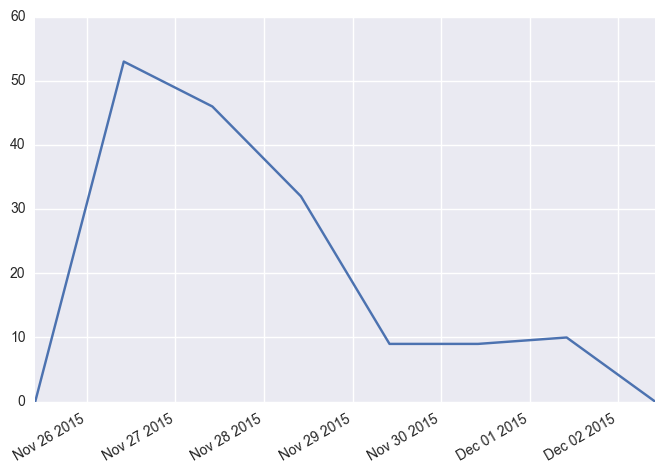

In [15]:
#countShopPayTimePeriods
id = 2
open_time = shop_open_date.loc[id][1];
print(open_time)
start_time = open_time;
end_time = open_time + datetime.timedelta(7)
s = countShopPayTimePeriods(id, date_range=[start_time, end_time], time_range=[datetime.timedelta(hours=9), datetime.timedelta(hours=14)])
s.plot()
plt.show()

In [13]:
shop_infos['cate_1_name'].value_counts()

美食          1415
超市便利店        579
休闲娱乐           2
医疗健康           2
美发/美容/美甲       1
购物             1
Name: cate_1_name, dtype: int64

In [14]:
shop_infos[shop_infos['cate_1_name'] == '超市便利店']

,id,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
8,9,杭州,1120,15,4.0,0.0,1,超市便利店,超市,NaN
9,10,孝感,98,10,NaN,NaN,0,超市便利店,超市,NaN
14,15,西安,101,19,NaN,NaN,0,超市便利店,超市,NaN
22,23,青岛,645,3,3.0,0.0,1,超市便利店,便利店,NaN
30,31,北京,571,18,NaN,NaN,1,超市便利店,超市,NaN
31,32,杭州,789,2,4.0,0.0,1,超市便利店,便利店,NaN
32,33,成都,1159,20,NaN,NaN,1,超市便利店,超市,NaN
34,35,东莞,296,18,2.0,0.0,0,超市便利店,超市,NaN


In [44]:
shop_infos["city"].value_counts().shape

(122,)

In [ ]:
def getShopPayCompareWeekSeries(shop_id)

In [ ]:
def getShopOpenTime(shop_id)
    return shop_open_time_index[shop_id]